# Welcome to the Real-State-Prediction Project

## Introduction
Hello and welcome to the Jupyter Notebook for the Real-State-Prediction project! I'm Ethan, and I'll be guiding you through this exciting journey into the world of real estate price prediction using machine learning.

In this notebook, we will explore the fascinating application of polynomial regression techniques, powered by Scikit-Learn, to accurately predict real estate prices. Our focus will be on integrating multiple data points such as property size, location, age, and other key features to create a comprehensive predictive model.

## Objectives
- To understand and implement polynomial regression in the context of real estate valuation.
- To process and analyze real estate data for predictive modeling.
- To evaluate the performance of our model and refine it for better accuracy.

## Let's Get Started!
Happy coding and analyzing!


In [1]:
# Libraries used for the project.
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from Functions import UploadData, dlc
import matplotlib.pyplot as plt

In [2]:
X_train, y_train = UploadData() # We load the data

In [3]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_train) # We normalize the data so it is more efficient.

In [4]:
sgdr = SGDRegressor(max_iter=1000) # We set the amount of iterations we are going to use.
sgdr.fit(X_normalized, y_train) # We feed the model with our normalized data.
print(f"Number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}") # It's always good to see our job so far to prevent errors.

Number of iterations completed: 55, number of weight updates: 5501.0


In [5]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"Model parameters: w:{w_norm}, b:{b_norm}") # As above, just checking the parameters so far.

Model parameters: w:[ -4.27869523  -5.43198454   6.96065477 -12.88649356], b:[360.90383862]


In [6]:
y_prediction = sgdr.predict(X_normalized) # We make the prediction

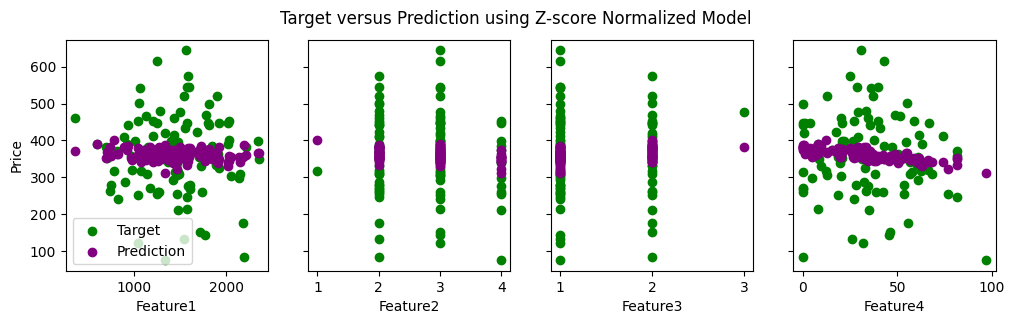

In [9]:
X_features = ['Feature1', 'Feature2', 'Feature3', 'Feature4']  
y_pred = y_prediction  

# Plot predictions and targets vs original features    
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

# Adjusting colors for clarity
target_color = 'green'  # Color for the target
prediction_color = 'purple'  # Color for the predictions

for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label='Target', color=target_color)
    ax[i].scatter(X_train[:, i], y_pred, color=prediction_color, label='Prediction')
    ax[i].set_xlabel(X_features[i])
    
ax[0].set_ylabel("Price")
ax[0].legend()

fig.suptitle("Target versus Prediction using Z-score Normalized Model")
plt.show()
